# Load Modules

In [22]:
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline

In [23]:
def load_data(file_pairs,src_dir='',dst_dir='.'):
    import os
    if not os.path.isdir(dst_dir):
        os.mkdir(dst_dir)
    for file_pair in file_pairs:
        src = os.path.abspath(os.path.expanduser(os.path.join(src_dir,file_pair[0])))
        dst = os.path.expanduser(os.path.join(dst_dir,file_pair[1]))
        if os.path.isfile(dst):
            os.remove(dst)
        if not os.path.islink(dst):
            os.symlink(src,dst)

def load_data_suffixes(file_pairs, src_dir='', dst_dir='.', suffixes=None):
    import os
    if not os.path.isdir(dst_dir):
        os.mkdir(dst_dir)
    if not suffixes:
        for file_pair in file_pairs:
            src = os.path.abspath(os.path.expanduser(os.path.join(src_dir, file_pair[0])))
            dst = os.path.expanduser(os.path.join(dst_dir, file_pair[1]))
            if os.path.isfile(dst):
                os.remove(dst)
            if not os.path.islink(dst):
                os.symlink(src, dst)
    else:
        for file_pair in file_pairs:
            for suffix_pair in suffixes:
                src = os.path.abspath(os.path.expanduser(
                    os.path.join(src_dir, file_pair[0] + suffix_pair[0])))
                dst = os.path.expanduser(
                    os.path.join(dst_dir, file_pair[1] + suffix_pair[1]))
                if os.path.isfile(dst):
                    os.remove(dst)
                if not os.path.islink(dst):
                    os.symlink(src, dst)

In [63]:
from seaborn.categorical import _BoxPlotter


class box_plotter(_BoxPlotter):
    def add_statistic_annotate(self, ax, x1, x2, y, h, value, text_type,
                               **kws):
        default_lw = mpl.rcParams["patch.linewidth"]
        lw = kws.get("linewidth", kws.get("lw", default_lw))
        width = x2 - x1
#         x1, x2 = x1 + .1 * width, x2 - .1 * width
#         x1, x2 = x1 + .5, x2 - .5
        ax.plot([x1, x1, x2, x2], [y + .5 * h, y + h, y + h, y + .5 * h],
                lw=1.5,
                c='k')
        if text_type == 'raw':
            ax.text((x1 + x2) * .5,
                    y + h * 1.5,
                    f'P = {value:.2e}',
                    ha='center',
                    va='bottom',
                    color='k')
        elif value >= 0.05:
            ax.text((x1 + x2) * .5,
                    y + h * 1.5,
                    'n.s.',
                    ha='center',
                    va='bottom',
                    color='k')
        elif value >= 0.01:
            ax.text((x1 + x2) * .5,
                    y + h * 1.5,
                    '*',
                    ha='center',
                    va='bottom',
                    color='k')
        elif value >= 0.001:
            ax.text((x1 + x2) * .5,
                    y_ + h * 1.5,
                    '**',
                    ha='center',
                    va='bottom',
                    color='k')
        else:
            ax.text((x1 + x2) * .5,
                    y + h * 1.5,
                    '***',
                    ha='center',
                    va='bottom',
                    color='k')

    def draw_statistic_annotate(self, ax, centerCol, **kwargs):
        from operator import methodcaller
        from scipy import stats
        if kwargs.get('statistic_test') == 'mannwhitneyu':
            statistic_kwargs = {
                'use_continuity': kwargs.get('use_continuity', True),
                'alternative': kwargs.get('alternative', None)
            }
        elif kwargs.get('statistic_test') == 'wilcoxon':
            statistic_kwargs = {
                'zero_method': kwargs.get('zero_method', 'wilcox'),
                'correction': kwargs.get('correction', False),
                'alternative': kwargs.get('alternative', 'two-sided')
            }
        elif kwargs.get('statistic_test') == 'ttest_ind':
            statistic_kwargs = {
                'axis': kwargs.get('axis', 0),
                'equal_var': kwargs.get('equal_var', True),
                'nan_policy': kwargs.get('nan_policy', 'propagate')
            }
        elif kwargs.get('statistic_test') == 'ttest_rel':
            statistic_kwargs = {
                'axis': kwargs.get('axis', 0),
                'nan_policy': kwargs.get('nan_policy', 'propagate')
            }
        else:
            raise ValueError(
                'statistic_test must be either mannwhitneyu, wilcoxon, ttest_ind or ttest_rel.'
            )
        ylim = ax.get_ylim()
        h = .05 * (ylim[1] - ylim[0])
#         print(self.plot_hues)
        if self.plot_hues is None:
            if centerCol == None :
                for i in range(len(self.plot_data) - 1):
                    pvalue = methodcaller(kwargs.get('statistic_test'),
                                          self.plot_data[i], self.plot_data[i + 1],
                                          **statistic_kwargs)(stats).pvalue
                    y = max(
                        mpl.cbook.boxplot_stats(self.plot_data[i])[0]['whishi'],
                        mpl.cbook.boxplot_stats(
                            self.plot_data[i + 1])[0]['whishi']) + .25 * h
                    self.add_statistic_annotate(ax,
                                                i,
                                                i + 1,
                                                y,
                                                h,
                                                pvalue,
                                                text_type=kwargs.get(
                                                    'text_type', 'raw'))
            else :
                for i in range(len(self.plot_data)):
                    if i != centerCol :
                        pvalue = methodcaller(kwargs.get('statistic_test'),
                                              self.plot_data[i], self.plot_data[centerCol],
                                              **statistic_kwargs)(stats).pvalue
                        y = max(
                            mpl.cbook.boxplot_stats(self.plot_data[i])[0]['whishi'],
                            mpl.cbook.boxplot_stats(
                                self.plot_data[centerCol])[0]['whishi']) + 2 * h * i
                        self.add_statistic_annotate(ax,
                                                    i,
                                                    centerCol,
                                                    y,
                                                    h,
                                                    pvalue,
                                                    text_type=kwargs.get(
                                                        'text_type', 'raw'))
                    
        else:
            for i in range(len(self.plot_data)):
                offsets = self.hue_offsets
                for j in range(len(self.hue_names) - 1):
                    pvalue = methodcaller(
                        kwargs.get('statistic_test'), self.plot_data[i][
                            self.plot_hues[i] == self.hue_names[j]],
                        self.plot_data[i][self.plot_hues[i] == self.hue_names[
                            j + 1]], **statistic_kwargs)(stats).pvalue
                    y = max(
                        mpl.cbook.boxplot_stats(
                            self.plot_data[i][self.plot_hues[i] ==
                                              self.hue_names[j]])[0]['whishi'],
                        mpl.cbook.boxplot_stats(self.plot_data[i][
                            self.plot_hues[i] == self.hue_names[j + 1]])[0]
                        ['whishi']) + .25 * h
                    self.add_statistic_annotate(ax,
                                                i + offsets[j],
                                                i + offsets[j + 1],
                                                y,
                                                h,
                                                pvalue,
                                                text_type=kwargs.get(
                                                    'text_type', 'raw'))
    
        ax.set_ylim(ylim[0], ylim[1] + 2.5 * h)


def boxplot(x=None,
            y=None,
            hue=None,
            data=None,
            order=None,
            hue_order=None,
            orient=None,
            color=None,
            palette=None,
            saturation=0.75,
            width=0.8,
            dodge=True,
            fliersize=5,
            linewidth=None,
            whis=1.5,
            ax=None,
            statistic_args=None,
            centerCol=None,
            **kwargs):
    plotter = box_plotter(x, y, hue, data, order, hue_order, orient, color,
                          palette, saturation, width, dodge, fliersize,
                          linewidth)
    if ax is None:
        ax = plt.gca()
    kwargs.update(dict(whis=whis))
    plotter.draw_boxplot(ax, kwargs)
    plotter.annotate_axes(ax)
    if statistic_args:
        kwargs = statistic_args
        plotter.draw_statistic_annotate(ax, centerCol, **kwargs)
    if plotter.orient == "h":
        ax.invert_yaxis()

cluster bin : dome_cluster/danRer11_2_nanog_fitCR_dome_cluster_from_256.bed

# motif occurrence on cluster genes

In [2]:
import os
os.chdir('/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/comparison')

In [3]:
%%bash 

intersectBed -u -a Nanog_256_excludeIgG_filtered_peaks.narrowPeak -b dome_cluster/danRer11_2_nanog_fitCR_dome_cluster_from_256.bed > cluster/Nanog_256_peak_in_cluster.bed
intersectBed -u -a stage_overlap/Nanog_1k_new_peaks.narrowPeak    -b dome_cluster/danRer11_2_nanog_fitCR_dome_cluster_from_256.bed > cluster/Nanog_1k_new_peak_in_cluster.bed
intersectBed -u -a stage_overlap/Nanog_dome_new_peaks.narrowPeak  -b dome_cluster/danRer11_2_nanog_fitCR_dome_cluster_from_256.bed > cluster/Nanog_dome_new_peak_in_cluster.bed


In [11]:
%%bash

awk 'BEGIN{FS=",";OFS="\t"}{print $2,$3,$4,$5,$6,$7,$8,$9,$10,$11,$12}'    ../gen_sup_tables/Nanog_256_peak.csv > cluster/Nanog_256_peak.csv.bed
awk 'BEGIN{FS=",";OFS="\t"}{print $2,$3,$4,$5,$6,$7,$8,$9,$10,$11,$12}'     ../gen_sup_tables/Nanog_1k_peak.csv > cluster/Nanog_1k_peak.csv.bed
awk 'BEGIN{FS=",";OFS="\t"}{print $2,$3,$4,$5,$6,$7,$8,$9,$10,$11,$12,$13}'   ../gen_sup_tables/Nanog_FitCR.csv > cluster/Nanog_dome_peak.csv.bed


In [12]:
%%bash

intersectBed -u -b cluster/Nanog_256_peak_in_cluster.bed      -a cluster/Nanog_256_peak.csv.bed  > cluster/Nanog_256_peak_in_cluster.csv.bed
intersectBed -u -b cluster/Nanog_1k_new_peak_in_cluster.bed   -a cluster/Nanog_1k_peak.csv.bed   > cluster/Nanog_1k_new_peak_in_cluster.csv.bed
intersectBed -u -b cluster/Nanog_dome_new_peak_in_cluster.bed -a cluster/Nanog_dome_peak.csv.bed > cluster/Nanog_dome_new_peak_in_cluster.csv.bed


In [20]:
%%bash

awk '$11=="True"{print}'  cluster/Nanog_256_peak_in_cluster.csv.bed      | wc -l
wc -l cluster/Nanog_256_peak_in_cluster.csv.bed
awk '$11=="True"{print}'  cluster/Nanog_1k_new_peak_in_cluster.csv.bed   | wc -l
wc -l cluster/Nanog_1k_new_peak_in_cluster.csv.bed
awk '$12=="True"{print}'  cluster/Nanog_dome_new_peak_in_cluster.csv.bed | wc -l
wc -l cluster/Nanog_dome_new_peak_in_cluster.csv.bed

107
244 cluster/Nanog_256_peak_in_cluster.csv.bed
32
139 cluster/Nanog_1k_new_peak_in_cluster.csv.bed
97
422 cluster/Nanog_dome_new_peak_in_cluster.csv.bed


In [35]:
peak_motif_num = pd.DataFrame([[107,244],[32,139],[97,442]])
peak_motif_num.columns = ['peak_contain_motif', 'total_peak']
peak_motif_num['percentage'] = peak_motif_num['peak_contain_motif'] / peak_motif_num['total_peak'] * 100
peak_motif_num['stage'] = ['256-cell', '1k-cell new', 'dome new']
peak_motif_num

,peak_contain_motif,total_peak,percentage,stage
0,107,244,43.852459,256-cell
1,32,139,23.021583,1k-cell new
2,97,442,21.945701,dome new


## bar plot -- Fig.4G

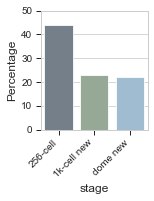

In [65]:
with sns.axes_style('whitegrid', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    fig, ax = plt.subplots(figsize=(6.4 * .35, 4.8 * .6))
    sns.barplot(
        x = 'stage',
        y='percentage',
        data=peak_motif_num,
        order=[
            '256-cell',
            '1k-cell new',
            'dome new'
        ],
        palette=['#727F8D', '#92AC93', '#98BDD8'],
        ax=ax,
    )
    ax.set_ylabel('Percentage')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_ylim(0,50)
    fig.tight_layout()
    fig.savefig(f'/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/figures/Fig4G_motif_occurence_inCluster.pdf', transparent=True)
    

# dome signal on cluster genes

In [57]:
bw_scan = True

os.chdir('/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/comparison')

import subprocess
def get_bigwig_mean(bigwig_file):
    import subprocess
    fold = subprocess.check_output(f'bigWigInfo {bigwig_file} | grep mean',
                                   shell=True).decode()
    fold = float(fold.split()[1])
    return fold

name = f'Nanog_256_in_cluster'
capture_regions_file = f'cluster/Nanog_256_peak_in_cluster.bed'
bigwig_files = ['/mnt/Storage/home/wangwen/project/fitCR/analysis/sampling_down/Nanog_dome.bw']
labels = ['nanog_dome']

cmd = f'''awk '{{print $1"\t"$2"\t"$3"\tBin_"NR}}' {capture_regions_file} > cluster/captures_regions.bed'''
subprocess.call(cmd, shell=True)
for label, bigwig_file in zip(labels, bigwig_files):
    bw_scan_cmd = f'bigWigAverageOverBed {bigwig_file} cluster/captures_regions.bed cluster/{name}_{label}_signal.tsv'
    if bw_scan:
        print(subprocess.check_output(bw_scan_cmd.split()).decode(), end='')

capture_regions = pd.read_csv(f'cluster/captures_regions.bed', sep='\t', header=None)
nanog_dome_signal_256 = pd.DataFrame(index=capture_regions[3].to_list())
for label, bigwig_file in zip(labels, bigwig_files):
    #avg = get_bigwig_mean(bigwig_file)
    nanog_dome_signal_256[label] = pd.read_csv(
        f'cluster/{name}_{label}_signal.tsv',
        sep='\t',
        header=None,
        index_col=0,
        names=['size', 'covered', 'sum', 'mean0', 'mean'])['mean']# / avg
nanog_dome_signal_256.head()


,nanog_dome
Bin_1,1.61014
Bin_2,19.05420
Bin_3,7.99142
Bin_4,9.19807
Bin_5,15.16610


In [58]:
bw_scan = True

os.chdir('/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/comparison')

import subprocess
def get_bigwig_mean(bigwig_file):
    import subprocess
    fold = subprocess.check_output(f'bigWigInfo {bigwig_file} | grep mean',
                                   shell=True).decode()
    fold = float(fold.split()[1])
    return fold

name = f'Nanog_1k_new_in_cluster'
capture_regions_file = f'cluster/Nanog_1k_new_peak_in_cluster.bed'
bigwig_files = ['/mnt/Storage/home/wangwen/project/fitCR/analysis/sampling_down/Nanog_dome.bw']
labels = ['nanog_dome']

cmd = f'''awk '{{print $1"\t"$2"\t"$3"\tBin_"NR}}' {capture_regions_file} > cluster/captures_regions.bed'''
subprocess.call(cmd, shell=True)
for label, bigwig_file in zip(labels, bigwig_files):
    bw_scan_cmd = f'bigWigAverageOverBed {bigwig_file} cluster/captures_regions.bed cluster/{name}_{label}_signal.tsv'
    if bw_scan:
        print(subprocess.check_output(bw_scan_cmd.split()).decode(), end='')

capture_regions = pd.read_csv(f'cluster/captures_regions.bed', sep='\t', header=None)
nanog_dome_signal_1k_new = pd.DataFrame(index=capture_regions[3].to_list())
for label, bigwig_file in zip(labels, bigwig_files):
    #avg = get_bigwig_mean(bigwig_file)
    nanog_dome_signal_1k_new[label] = pd.read_csv(
        f'cluster/{name}_{label}_signal.tsv',
        sep='\t',
        header=None,
        index_col=0,
        names=['size', 'covered', 'sum', 'mean0', 'mean'])['mean']# / avg
nanog_dome_signal_1k_new.head()


,nanog_dome
Bin_1,4.00359
Bin_2,1.35897
Bin_3,10.45810
Bin_4,10.98220
Bin_5,10.05870


In [59]:
bw_scan = True

os.chdir('/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/comparison')

import subprocess
def get_bigwig_mean(bigwig_file):
    import subprocess
    fold = subprocess.check_output(f'bigWigInfo {bigwig_file} | grep mean',
                                   shell=True).decode()
    fold = float(fold.split()[1])
    return fold

name = f'Nanog_dome_new_in_cluster'
capture_regions_file = f'cluster/Nanog_dome_new_peak_in_cluster.bed'
bigwig_files = ['/mnt/Storage/home/wangwen/project/fitCR/analysis/sampling_down/Nanog_dome.bw']
labels = ['nanog_dome']

cmd = f'''awk '{{print $1"\t"$2"\t"$3"\tBin_"NR}}' {capture_regions_file} > cluster/captures_regions.bed'''
subprocess.call(cmd, shell=True)
for label, bigwig_file in zip(labels, bigwig_files):
    bw_scan_cmd = f'bigWigAverageOverBed {bigwig_file} cluster/captures_regions.bed cluster/{name}_{label}_signal.tsv'
    if bw_scan:
        print(subprocess.check_output(bw_scan_cmd.split()).decode(), end='')

capture_regions = pd.read_csv(f'cluster/captures_regions.bed', sep='\t', header=None)
nanog_dome_signal_dome_new = pd.DataFrame(index=capture_regions[3].to_list())
for label, bigwig_file in zip(labels, bigwig_files):
    #avg = get_bigwig_mean(bigwig_file)
    nanog_dome_signal_dome_new[label] = pd.read_csv(
        f'cluster/{name}_{label}_signal.tsv',
        sep='\t',
        header=None,
        index_col=0,
        names=['size', 'covered', 'sum', 'mean0', 'mean'])['mean']# / avg
nanog_dome_signal_dome_new.head()


,nanog_dome
Bin_1,2.19767
Bin_2,2.61360
Bin_3,1.75453
Bin_4,6.66429
Bin_5,8.15863


In [61]:
binding_strength_in_cluster = pd.DataFrame({
    'value':
    np.concatenate(
        (nanog_dome_signal_256['nanog_dome'].values,
         nanog_dome_signal_1k_new['nanog_dome'].values,
         nanog_dome_signal_dome_new['nanog_dome'].values)),
    'stage': ['256-cell'] * nanog_dome_signal_256.shape[0] +
    ['1k-cell new'] * nanog_dome_signal_1k_new.shape[0] +
    ['dome new'] * nanog_dome_signal_dome_new.shape[0]
})
binding_strength_in_cluster.head()


,value,stage
0,1.61014,256-cell
1,19.05420,256-cell
2,7.99142,256-cell
3,9.19807,256-cell
4,15.16610,256-cell


## box plot -- Fig.S5I

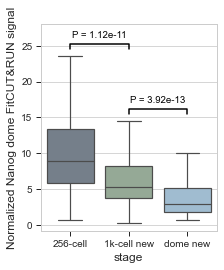

In [69]:
with sns.axes_style('whitegrid', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    fig, ax = plt.subplots(figsize=(6.4 * .5, 4.8 * .75))
    boxplot(
        x='stage',
        y='value',
        hue=None,
        data=binding_strength_in_cluster,
        order=['256-cell', '1k-cell new', 'dome new'],
        hue_order=None,
        orient=None,
        color=None,
        palette=['#727F8D', '#92AC93', '#98BDD8'],
        saturation=0.75,
        width=0.8,
        dodge=True,
        fliersize=5,
        linewidth=None,
        whis=1.5,
        ax=ax,
        statistic_args={
            'statistic_test': 'mannwhitneyu',
        },
        showfliers=False,
    )
    ax.set_ylabel('Normalized Nanog dome FitCUT&RUN signal')
    fig.tight_layout()
    fig.savefig(f'/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/figures/Suppe_Fig5I_binding_strength_inCluster.pdf', transparent=True)
